# Import Libraries

In [2]:
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from keras_facenet import FaceNet
import numpy as np
import joblib
from sklearn.metrics import accuracy_score
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
class FACELOADING:
    from mtcnn.mtcnn import MTCNN
    detector = MTCNN()
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []

    def extract_face(self,filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x),abs(y)
        face = img[y:y+h,x:x+w]
        face_arr = cv.resize(face,self.target_size)
        print(face_arr)
        return face_arr


    def load_faces(self,dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory + '/' + sub_dir + '/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully : {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X),np.asarray(self.Y)

    def plot_images(self):
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('OFF')

In [11]:
faceloading = FACELOADING(r'C:\Users\Administrator\Desktop\DetectionModels\SVM_FACE_DETECTION_REALTIME\train')
X,Y = faceloading.load_classes()

1/1 [==============================] - 0s 29ms/step
[[[ 53  35  25]
  [ 46  27  17]
  [ 51  30  21]
  ...
  [119  94  82]
  [161 136 124]
  [128 106  94]]

 [[ 49  31  21]
  [ 51  33  23]
  [ 50  30  21]
  ...
  [ 43  31  28]
  [ 47  35  31]
  [ 50  38  33]]

 [[ 46  27  20]
  [ 48  29  22]
  [ 54  35  28]
  ...
  [163 164 168]
  [150 149 152]
  [159 157 158]]

 ...

 [[245 233 230]
  [233 198 186]
  [227 174 155]
  ...
  [215 215 215]
  [217 217 217]
  [215 215 215]]

 [[244 243 240]
  [239 233 226]
  [230 200 192]
  ...
  [217 217 217]
  [217 217 217]
  [216 216 216]]

 [[244 239 239]
  [248 239 239]
  [246 231 226]
  ...
  [216 216 216]
  [217 217 217]
  [217 217 217]]]
1/1 [==============================] - 0s 27ms/step
[[[ 74  60  51]
  [ 88  65  57]
  [125  95  83]
  ...
  [ 55  43  33]
  [ 56  42  31]
  [112  95  85]]

 [[ 48  31  23]
  [ 76  55  46]
  [115  88  74]
  ...
  [ 48  37  29]
  [ 66  54  44]
  [ 70  56  45]]

 [[ 47  31  20]
  [ 65  47  35]
  [100  74  59]
  ...
  [ 

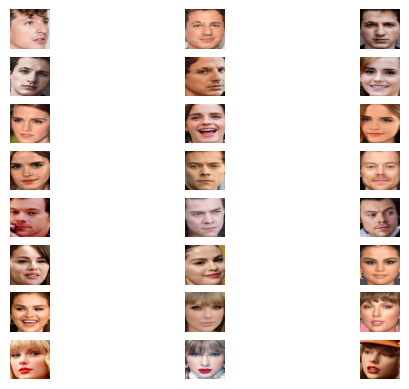

In [12]:
faceloading.plot_images()

In [13]:
np.savez_compressed
embedder = FaceNet()

def get_embedding(face_img):
  face_img = face_img.astype('float32')
  face_img = np.expand_dims(face_img,axis=0)
  yhat = embedder.embeddings(face_img)
  return yhat[0]

In [14]:
EMBEDDED_X = []

for img in X:
  EMBEDDED_X.append(get_embedding(img))
EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 100ms/step


In [16]:
np.savez_compressed(r'C:\Users\Administrator\Desktop\DetectionModels\SVM_FACE_DETECTION_REALTIME\faces_embeddings_done_4classes.npz',EMBEDDED_X,Y)

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(EMBEDDED_X,Y,shuffle=True,random_state= 42)

In [19]:
from sklearn.svm import SVC

model = SVC(kernel='linear',probability=True)
model.fit(x_train,y_train)

SVC(kernel='linear', probability=True)

In [20]:
ypreds_train = model.predict(x_train)
ypreds_test = model.predict(x_test)

In [22]:
accuracy_score(y_train,ypreds_train)

1.0

In [23]:
accuracy_score(y_test,ypreds_test)

1.0

In [24]:
joblib.dump(model,r"C:\Users\Administrator\Desktop\DetectionModels\SVM_FACE_DETECTION_REALTIME\SVM_model.joblib")

['C:\\Users\\Administrator\\Desktop\\DetectionModels\\SVM_FACE_DETECTION_REALTIME\\SVM_model.joblib']